In [77]:
import pandas as pd # для загрузки данных и применения One-Hot Encoding
import numpy as np # для расчета среднего и стандартного отклонения
import matplotlib.pyplot as plt # для создания графиков
import seaborn as sns # для создания статистических графиков
# from sklearn import tree
from sklearn.linear_model import LogisticRegression # для построения модели логистической регрессии
# from sklearn.tree import plot_tree # для отрисовки дерева классификации
from sklearn.model_selection import train_test_split # для разделения данных на тренировочные и тестовые
from sklearn.model_selection import cross_val_score # для кросс валидации
from sklearn.metrics import confusion_matrix # для создания матрицы ошибок
from sklearn.metrics import plot_confusion_matrix # для отрисовки матрицы ошибок

In [78]:
from google.colab import  files
uploaded = files.upload()

Saving DS_PVT_LOG_REGRESSION.xlsx to DS_PVT_LOG_REGRESSION.xlsx


In [79]:
df = pd.read_excel(open('DS_PVT_LOG_REGRESSION.xlsx', 'rb'))

In [80]:
df.head()

,PVT,Local,Ascites_simple,EVL_simple,PH_dur_simple,HB_NORM,PLT_NORM,TB_NORM,PV_diam_NORM
0,1,0,0,0,1,0.542,0.226,0.045,0.329
1,1,0,1,0,0,0.569,0.289,0.098,0.419
2,1,1,1,0,0,0.406,0.063,0.039,0.452
3,1,0,1,0,0,0.656,0.196,0.190,0.161
4,1,0,1,0,0,0.649,0.089,0.033,0.303


In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 841 entries, 0 to 840
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   PVT             841 non-null    int64  
 1   Local           841 non-null    int64  
 2   Ascites_simple  841 non-null    int64  
 3   EVL_simple      841 non-null    int64  
 4   PH_dur_simple   841 non-null    int64  
 5   HB_NORM         841 non-null    float64
 6   PLT_NORM        841 non-null    float64
 7   TB_NORM         841 non-null    float64
 8   PV_diam_NORM    841 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.3 KB


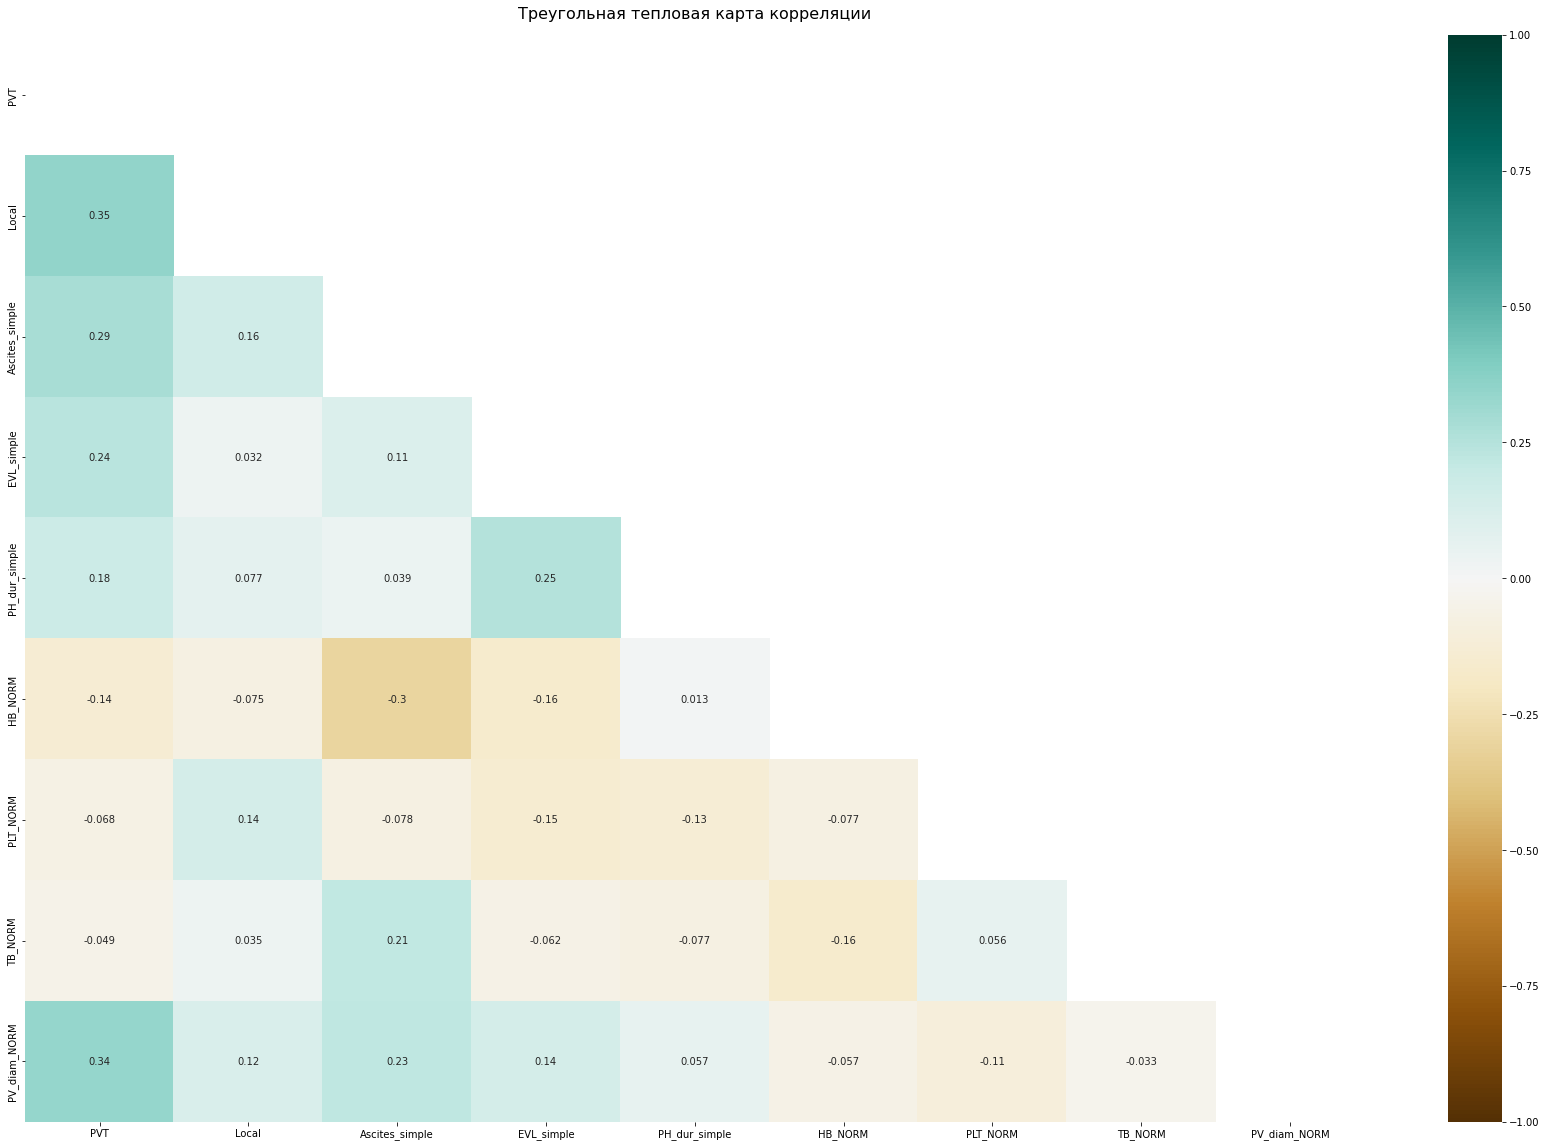

In [82]:
plt.figure(figsize=(30, 20)) 
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool_)) 
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG') 
heatmap.set_title('Треугольная тепловая карта корреляции', fontdict={'fontsize':16}, pad=16);

In [83]:
X = df.drop('PVT', axis=1).copy()
X.head() # смотрим первые 5 строк: целевая переменная PVT отсутствует


,Local,Ascites_simple,EVL_simple,PH_dur_simple,HB_NORM,PLT_NORM,TB_NORM,PV_diam_NORM
0,0,0,0,1,0.542,0.226,0.045,0.329
1,0,1,0,0,0.569,0.289,0.098,0.419
2,1,1,0,0,0.406,0.063,0.039,0.452
3,0,1,0,0,0.656,0.196,0.190,0.161
4,0,1,0,0,0.649,0.089,0.033,0.303


In [84]:
y = df['PVT'].copy().values
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [86]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [88]:
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'),y_train)

In [89]:
from collections import Counter
print("Число объектов в обучающей выборке по исходу PVT до применения SMOTE :" , Counter(y_train))
print("Число объектов в обучающей выборке по исходу PVT до применения SMOTE :" , Counter(y_train_smote))

Число объектов в обучающей выборке по исходу PVT до применения SMOTE : Counter({0: 499, 1: 89})
Число объектов в обучающей выборке по исходу PVT до применения SMOTE : Counter({1: 499, 0: 499})


In [90]:
logmodel = LogisticRegression(penalty='l2', dual=False, tol=0.0001, 
                              C=1.0, fit_intercept=True, intercept_scaling=1, 
                              class_weight=None, random_state=None, solver='lbfgs', 
                              max_iter=100, multi_class='auto', verbose=0, warm_start=False, 
                              n_jobs=None, l1_ratio=None)

In [91]:
logmodel.fit(X_train_smote, y_train_smote)

LogisticRegression()

In [92]:
predictions = logmodel.predict(X_test)

In [93]:
from sklearn.metrics import classification_report

In [94]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n           0       0.96      0.81      0.88       209\n           1       0.48      0.82      0.61        44\n\n    accuracy                           0.81       253\n   macro avg       0.72      0.82      0.74       253\nweighted avg       0.87      0.81      0.83       253\n'

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


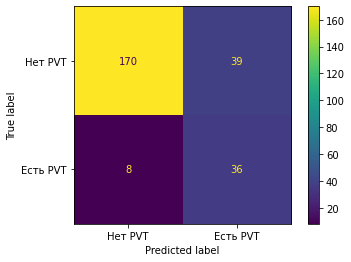

In [95]:
plot_confusion_matrix(logmodel, X_test, y_test, display_labels=["Нет PVT", "Есть PVT"])

In [96]:
from sklearn.metrics import accuracy_score

In [97]:
accuracy_score(y_test, predictions)

0.8142292490118577

In [98]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.327721
         Iterations 7
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.249     
Dependent Variable: y                AIC:              567.2269  
Date:               2022-06-17 20:31 BIC:              605.1036  
No. Observations:   841              Log-Likelihood:   -275.61   
Df Model:           7                LL-Null:          -367.16   
Df Residuals:       833              LLR p-value:      4.3077e-36
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     7.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Local              2.4534   0.3280  7.4788 0.0000  1.8104  3.0963
Ascites_simple     0.6980   0.2276  3.0668 0.0022  0.2519  1.1441


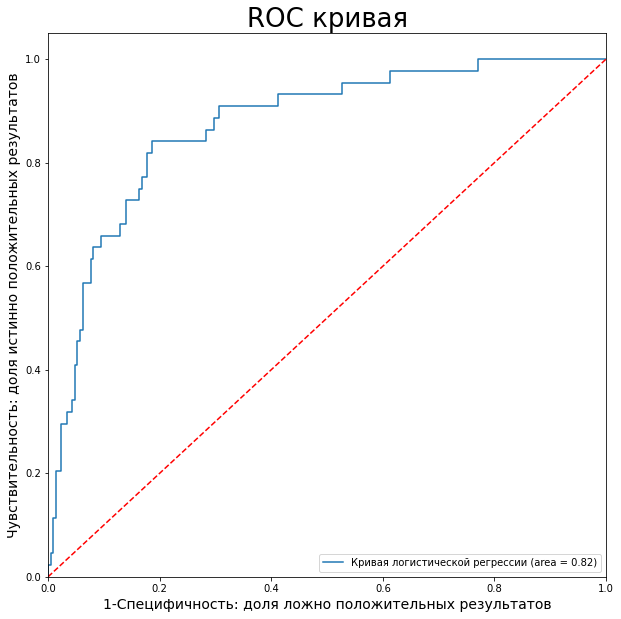

In [111]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logmodel.predict_proba(X_test)[:,1])
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, label='Кривая логистической регрессии (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Специфичность: доля ложно положительных результатов', fontsize=14)
plt.ylabel('Чувствительность: доля истинно положительных результатов', fontsize=14)
plt.title('ROC кривая', fontsize=26)
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()